# Reporte de práctica 12: Análisis de texto con nltk y wordcloud


En esta práctica trataremos con cadenas de caracteres. En la base de datos se cuenta con las sinopsis de los videos que se registraron en el concurso.


## Objetivo

 - Usar nltk o sklearn para hacer algún tipo de análisis de texto
 - Apoyarse en las herramientas de bash para preprocesamiento.
 
## Lectura de datos

Se aplican comandos del bash de sistema para poder saber cuales son las columnas de los archivos .csv y para poder obtener un ejemplo de los datos de cada archivo.

### Columnas de los csv

In [8]:
!head -n 1 2016.csv | tr , '\n' | grep -v "^$" | nl -v 2

     2	Sinopsis
     3	limpios


In [10]:
!head -n 1 2017.csv | tr , '\n' | grep -v "^$" | nl -v 2

     2	Sinopsis
     3	limpios


In [11]:
!head -n 1 2018.csv | tr , '\n' | grep -v "^$" | nl -v 2

     2	Categoria
     3	Edad
     4	Pais
     5	Titulo
     6	Genero
     7	Duracion
     8	Marca
     9	Referencia
    10	Dias
    11	Marcas
    12	Personas
    13	Sinopsis
    14	limpios


In [12]:
!head -n 1 2018mx.csv | tr , '\n' | grep -v "^$" | nl -v 2

     2	Sinopsis
     3	limpios


Se consulta los primeros cinco registros para confirmar que la información que tenemos es la que se necesita.

### Ejemplos 

In [13]:
!head -n 5 2016.csv

Sinopsis,limpios
"Valentina España, una niña preocupada por que sus amigas ya no juegan si no que se la pasan en el celular y el computador mucho tiempo, decide llamar la atención, mostrando a los niños que hay otra forma de disfrutar sin permanecer tanto tiempo en las redes, y asi comunicarse de manera personal, como es disfrutar de la naturaleza, algo tan simple y a la mano de todos, invita a deyci una niña que siempre ha vivido con la naturaleza y a otro grupo de amigos que solo se la pasan con su celular.",valentin españ niñ preocup amig jueg si pas celul comput tiemp decid llam atencion mostr niñ form disfrut permanec tiemp red asi comunic maner personal disfrut naturalez tan simpl man invit deyci niñ siempr viv naturalez grup amig sol pas celul
"sammy es una pequeña soñadora que espera con ansias un día especial en la playa para jugar y divertirse, pero ella no cuenta con que las personas que se encuentran en este lugar estan desconectadas del mundo, porque están sumergidas y ent

In [14]:
!head -n 5 2017.csv

Sinopsis,limpios
"ESTA HISTORIA INICIA CON CADA UNO DE LOS PERSONAJES CAMINANDO POR LA CALLE, ELLOS SE ENCUENTRAN EN UN PUNTO DETERMINADO (TIENE QUE TENER ESPEJOS PARA CONSTRUIR LA HISTORIA PARALELA) SE GUSTAN Y JUNTOS SE IMAGINAN EL FUTURO (QUE ES LO QUE SE REFLEJA EN LOS ESPEJOS); MIENTRAS ELLOS TODO LO VAN ESCRIBIENDO EN SUS CELULARES, CADA COSA QUE IMAGINAN, SON LOS REFLEJOS LOS QUE LO CONVIERTEN EN REALIDAD. TODO VA A BLANCO Y NEGRO, TAN SOLO LOS REFLEJOS DE LOS PERSONAJES ESTARÍN A COLOR, ASÍ EL EFECTO VISUAL DE LAS ACCIONES REALIZADAS SE VERÍN DIFERENTES A LO COTIDIANO DENTRO DE LA HISTORIA.",histori inici cad personaj camin call encuentr punt determin ten espej constru histori paralel gust junt imagin futur reflej espej mientr van escrib celular cad cos imagin reflej conviert realid va blanc negr tan sol reflej personaj estar n color asi efect visual accion realiz ver n diferent cotidian dentr histori
"La historia tratarÍ de un convencional joven, rutinario, que a pesar de e

In [16]:
!head -n 5 2018.csv

Categoria,Edad,Pais,Titulo,Genero,Duracion,Marca,Referencia,Dias,Marcas,Personas,Sinopsis,limpios
AFICIONADO,24,Colombia,0.5,Drama,300,Motorola,Moto G 2,7,130.0,4,"Jimena, mujer rígidamente estructurada, actualiza su aplicación. Ahora puede medir su emocionalidad, le es útil hasta que pierde el control y ya no sabe si sentir o chequear qué está sintiendo.",jimen muj rigid estructur actualiz aplic ahor pued med emocional util pierd control sab si sent chequ
CRONICAS,26,Belgium,12,Crónica,180,Apple,ad,1,,1,<ksdvnc,ksdvnc
AFICIONADO,34,Colombia,#ATuRitmo,Comedia,65,Huawei,P10 lite,8,245.0,7,"Un día cualquiera en el Sena David se encuentra en el aula de estudios cuando todos los demás se van, no se percata de que Christian   se queda también y observa todo lo que hace.",dia cualqu sen dav encuentr aul estudi demas van percat christi qued observ hac
AFICIONADO,41,Colombia,#EstamosConPipe,Ficción,300,Apple,Ipad Mini 2 Modelo: MD528E7/A,16,153.0,11,"Pipe es un títere que se gana la lotería, p

In [17]:
!head -n 5 2018mx.csv

Sinopsis,limpios
"Se trata de una niña que pensaba que la última palabra la tenia el culo, pero comprueba que no era así..",trat niñ pens ultim palabr teni cul comprueb asi
una pequeña probada de lo que tenemos planeado para una serie de nuestro pequeño set de producciones realizado por jóvenes de iztapalapa llamado: Micaxe Producciones,pequeñ prob plan seri pequeñ set produccion realiz joven iztapalap llam micax produccion
"Luzma es una maestra jubilada que recuerda con melancolía sus años de enseñanza, pero una tarde descubrirá que ella aún puede dar lo mejor.",luzm maestr jubil recuerd melancol años enseñ tard descubr aun pued dar mejor
"TRATA SOBRE CUANDO ALGUIEN VIAJA DE NOCHE POR LAS CARRETERAS, SE CUENTAS DIVERSAS LEYENDAS URBANAS DE DISTINTAS APARICIONES, MUCHAS VECES POR SUGESTION, QUIEN NO HA PLATICADO DE MONSTRUOS Y AL DORMIR SUEÑA CON ELLOS?. TERROR DE CARRETERA ENFOCA ALGUNAS APARICIONES PRODUCIDAS POR LA MENTE... PORQUE ESO DICEN, QUE ES TU MENTE LA QUE TE GASTA BROMAS PE

## La librería nltk

El kit de herramientas de lenguaje natural, o más comúnmente NLTK, es un conjunto de bibliotecas y programas para el procesamiento del lenguaje natural (PLN) simbólico y estadísticos para el lenguaje de programación Python. NLTK incluye demostraciones gráficas y datos de muestra. Se importa la librería al programa.

In [1]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
print(stopwords.words("spanish")[:10])
from nltk.sentiment.vader import SentimentIntensityAnalyzer
s = SentimentIntensityAnalyzer() # en inglés hasta podemos distinguir entre palabras positivas y negativas
print(s.polarity_scores('useless'))
print(s.polarity_scores('marvelous'))


[u'de', u'la', u'que', u'el', u'en', u'y', u'a', u'los', u'del', u'se']
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4215}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5994}


[nltk_data] Downloading package punkt to
[nltk_data]     /home/samataroukami/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/samataroukami/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/samataroukami/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Ahora se importa un documento para procesar en nltk, el 2018.xslx. Se cuenta con la librería necesaria para poder trabajar con archivos tipo Excel desde Python.

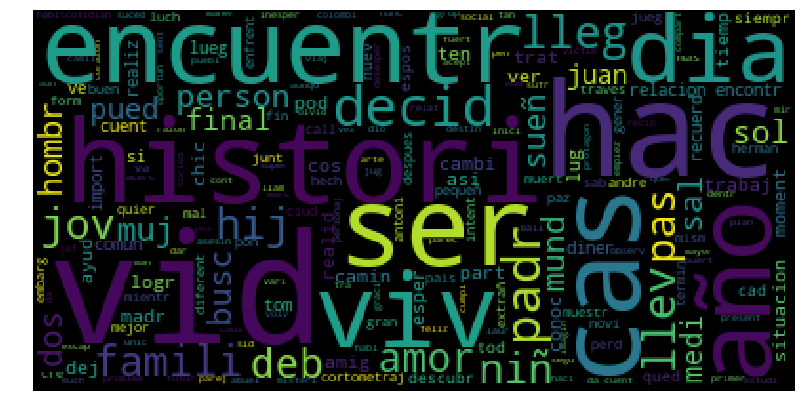

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

d = pd.read_excel('https://raw.githubusercontent.com/SamatarouKami/CIENCIA_DE_DATOS/master/2018.xlsx', index_col=None, header=0, sheet_name=0)
d = d[['Categoria','Edad','Pais', 'Titulo','Genero', 'Duracion', 'Marca','Referencia','Dias','Marcas','Personas','Sinopsis']]
n = len(d)
spa = stopwords.words("spanish")
stemmer = SnowballStemmer('spanish')
tokenizer = RegexpTokenizer(r'\w+') # para eliminar puntuación
reemplazos = []
for r in range(n):
    original = d.Sinopsis[r]
    reemplazo = ''
    if original != 'SIN_DESCR':
        quedar = [stemmer.stem(p) for p in tokenizer.tokenize(original) if p.lower() not in spa]
        reemplazo = ' '.join(quedar)
    reemplazos.append(reemplazo)
d['limpios'] = reemplazos
texto = ' '.join(reemplazos)
nube = WordCloud().generate(texto)
plt.rcParams["figure.figsize"] = [15, 7]
plt.imshow(nube)
plt.axis("off")
plt.show()
d.to_csv("2018.csv",  index=False, encoding="utf-8")

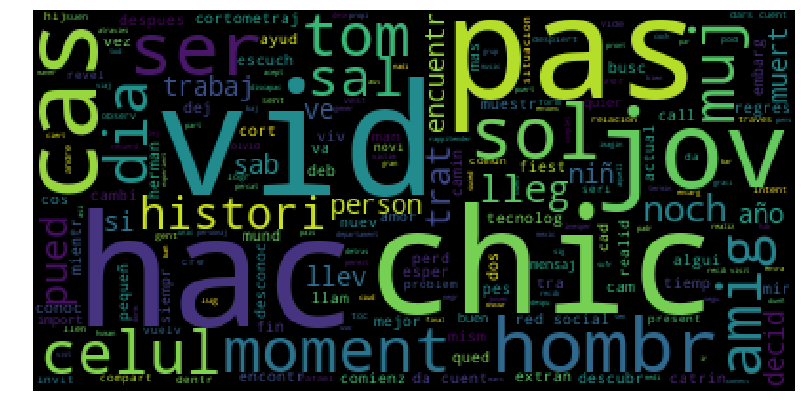

In [3]:
d = pd.read_excel('https://raw.githubusercontent.com/SamatarouKami/CIENCIA_DE_DATOS/master/2018mx.xlsx', index_col=None, header=0, sheet_name=0)
d = d[['Sinopsis']]
n = len(d)
spa = stopwords.words("spanish")
stemmer = SnowballStemmer('spanish')
tokenizer = RegexpTokenizer(r'\w+') # para eliminar puntuación
reemplazos = []
for r in range(n):
    original = d.Sinopsis[r]
    reemplazo = ''
    if original != 'SIN_DESCR':
        quedar = [stemmer.stem(p) for p in tokenizer.tokenize(original) if p.lower() not in spa]
        reemplazo = ' '.join(quedar)
    reemplazos.append(reemplazo)
d['limpios'] = reemplazos
texto = ' '.join(reemplazos)
nube = WordCloud().generate(texto)
plt.rcParams["figure.figsize"] = [15, 7]
plt.imshow(nube)
plt.axis("off")
plt.show()
d.to_csv("2018mx.csv",  index=False, encoding="utf-8")


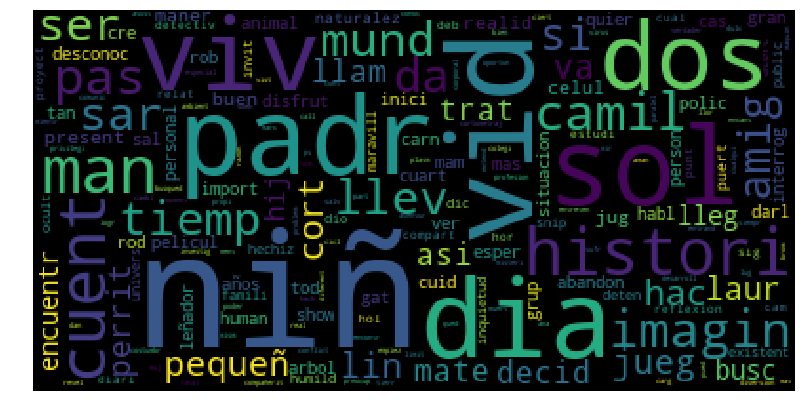

In [4]:
d = pd.read_excel('https://raw.githubusercontent.com/SamatarouKami/CIENCIA_DE_DATOS/master/2016.xlsx', index_col=None, header=0, sheet_name=0)
d = d[['Sinopsis']]
n = len(d)
spa = stopwords.words("spanish")
stemmer = SnowballStemmer('spanish')
tokenizer = RegexpTokenizer(r'\w+') # para eliminar puntuación
reemplazos = []
for r in range(n):
    original = d.Sinopsis[r]
    reemplazo = ''
    if original != 'SIN_DESCR':
        quedar = [stemmer.stem(p) for p in tokenizer.tokenize(original) if p.lower() not in spa]
        reemplazo = ' '.join(quedar)
    reemplazos.append(reemplazo)
d['limpios'] = reemplazos
texto = ' '.join(reemplazos)
nube = WordCloud().generate(texto)
plt.rcParams["figure.figsize"] = [15, 7]
plt.imshow(nube)
plt.axis("off")
plt.show()
d.to_csv("2016.csv",  index=False, encoding="utf-8")


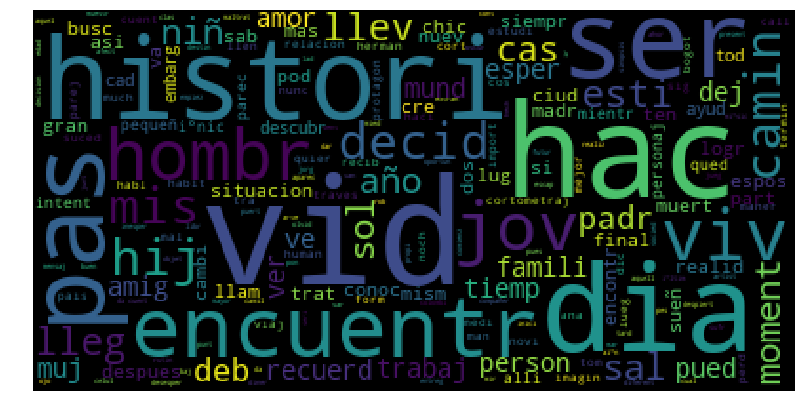

In [5]:
d = pd.read_excel('https://raw.githubusercontent.com/SamatarouKami/CIENCIA_DE_DATOS/master/2017.xlsx', index_col=None, header=0, sheet_name=0)
d = d[['Sinopsis']]
n = len(d)
spa = stopwords.words("spanish")
stemmer = SnowballStemmer('spanish')
tokenizer = RegexpTokenizer(r'\w+') # para eliminar puntuación
reemplazos = []
for r in range(n):
    original = d.Sinopsis[r]
    reemplazo = ''
    if original != 'SIN_DESCR':
        quedar = [stemmer.stem(p) for p in tokenizer.tokenize(original) if p.lower() not in spa]
        reemplazo = ' '.join(quedar)
    reemplazos.append(reemplazo)
d['limpios'] = reemplazos
texto = ' '.join(reemplazos)
nube = WordCloud().generate(texto)
plt.rcParams["figure.figsize"] = [15, 7]
plt.imshow(nube)
plt.axis("off")
plt.show()
d.to_csv("2017.csv", index=False, encoding="utf-8")


## Conclusión

Al usar la librería nltk se obtivieron imagenes con las palabras más utilizadas en las sinopsis de los videos. Las palabras que se ven presentes en todos gráficos son:

    - vid
    - dia
    - viv
    - histori
    - ser
    
La librería es muy util ya que se puede corregir los errores ortográficos desde codigo Python.

--06 de junio 2019-- Luis Angel Gutiérrez Rodríguez 1484412